In [1]:
import os
import json
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def merge_dicts(base, new, key=""):
    """Create a flat dict structure"""
    if isinstance(new, dict):
        for new_key, val in new.items():
            if key:
                flat_key = key + ": " + new_key
            else:
                flat_key = new_key
            if flat_key not in base:
                base[flat_key] = []
            merge_dicts(base, val, key=flat_key)
    else:
        base[key].append(new)

In [15]:
def make_plots(which_files, flat_keys):

    for key in flat_keys:
        vals_to_plot = []
        try:
            for json_file in which_files:
                flat_dict = flat_dicts[json_file]
                vals = flat_dict[key]
                if vals and isinstance(vals[0], float) and not all([vals[0] == i for i in vals]):
                    vals_to_plot.append(vals)
        except:
            pass
        if len(vals_to_plot) > 0:
            for vals in vals_to_plot:
                plt.plot(vals)
            plt.legend(which_files, loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title(key)
            plt.show()

In [3]:
json_files = [f for f in os.listdir(".") if f[-len('.json'):] == ".json"]

In [4]:
flat_dicts = {}
flat_keys = set()

for json_file in json_files:
    with open(json_file, 'r') as f:
        data = json.load(f)
        flat_dict = {}
        for point in data:
            merge_dicts(flat_dict, point)
        flat_keys = flat_keys.union(set(flat_dict.keys()))
        flat_dicts[json_file] = flat_dict

In [13]:
json_files

['alpine-iter1-128gb.json',
 'alpine-iter1-12gb.json',
 'alpine-iter1-16gb.json',
 'alpine-iter1-18gb.json',
 'alpine-iter1-24gb.json',
 'alpine-iter1-32gb.json',
 'alpine-iter1-4gb.json',
 'alpine-iter1-64gb.json',
 'alpine-iter1-6gb.json',
 'alpine-iter1-8gb.json',
 'alpine-iter2-128gb.json',
 'alpine-iter2-12gb.json',
 'alpine-iter2-16gb.json',
 'alpine-iter2-18gb.json',
 'alpine-iter2-24gb.json',
 'alpine-iter2-32gb.json',
 'alpine-iter2-4gb.json',
 'alpine-iter2-64gb.json',
 'alpine-iter2-6gb.json',
 'alpine-iter2-8gb.json',
 'alpine-iter3-128gb.json',
 'alpine-iter3-12gb.json',
 'alpine-iter3-16gb.json',
 'alpine-iter3-18gb.json',
 'alpine-iter3-24gb.json',
 'alpine-iter3-32gb.json',
 'alpine-iter3-4gb.json',
 'alpine-iter3-64gb.json',
 'alpine-iter3-6gb.json',
 'alpine-iter3-8gb.json',
 'alpine-iter4-128gb.json',
 'alpine-iter4-12gb.json',
 'alpine-iter4-16gb.json',
 'alpine-iter4-18gb.json',
 'alpine-iter4-24gb.json',
 'alpine-iter4-32gb.json',
 'alpine-iter4-4gb.json',
 'alpin

In [18]:
alpine = [f for f in json_files if "alpine" in f]
busybox = [f for f in json_files if "busybox" in f]
ubuntu = [f for f in json_files if "ubuntu" in f]
nginx =  [f for f in json_files if "nginx" in f]
centos =  [f for f in json_files if "centos" in f]

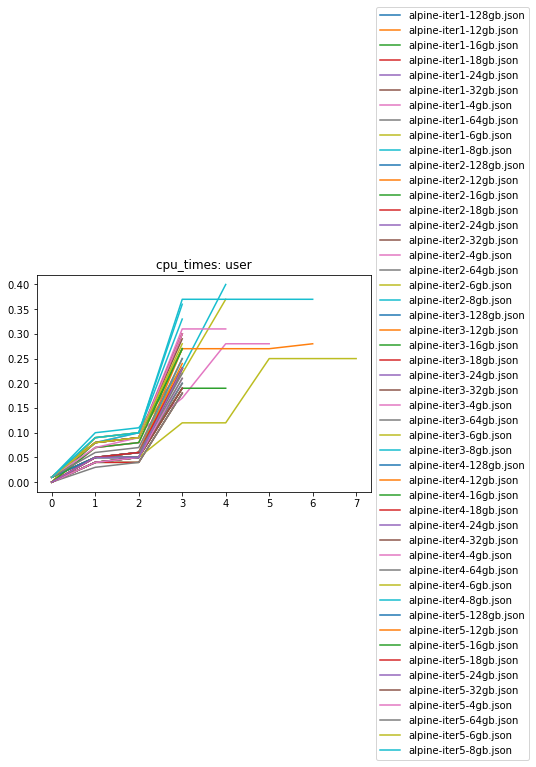

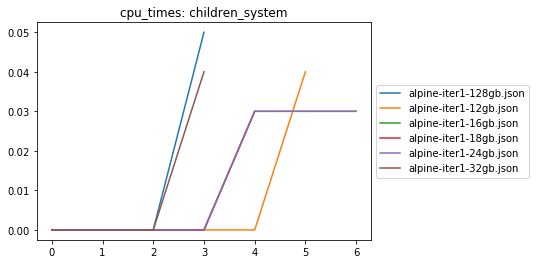

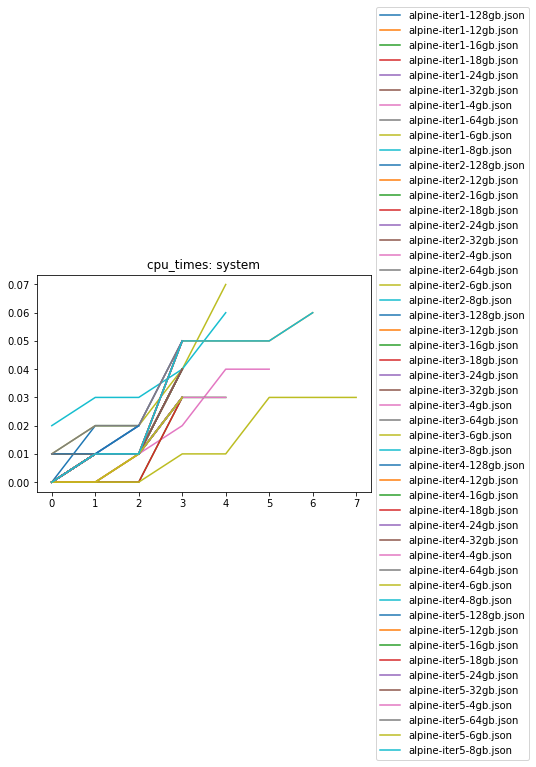

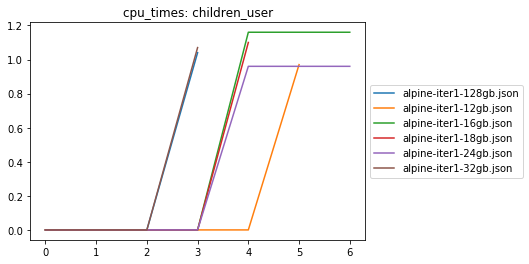

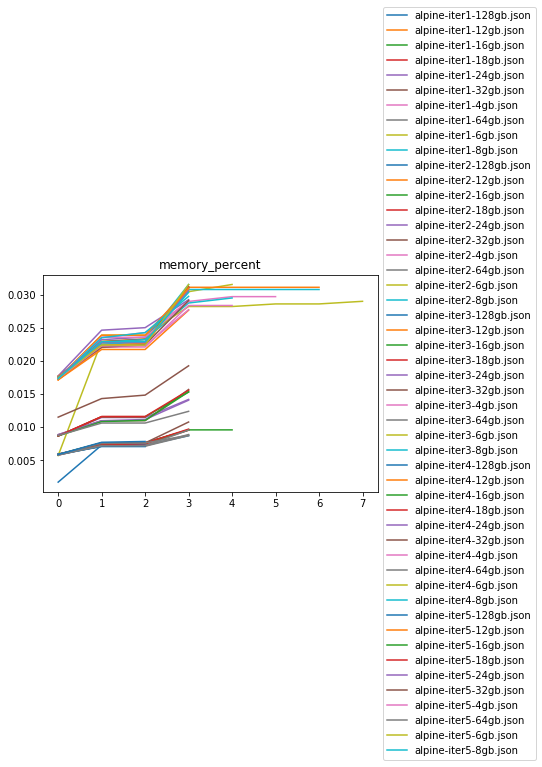

In [19]:
make_plots(alpine, flat_keys)

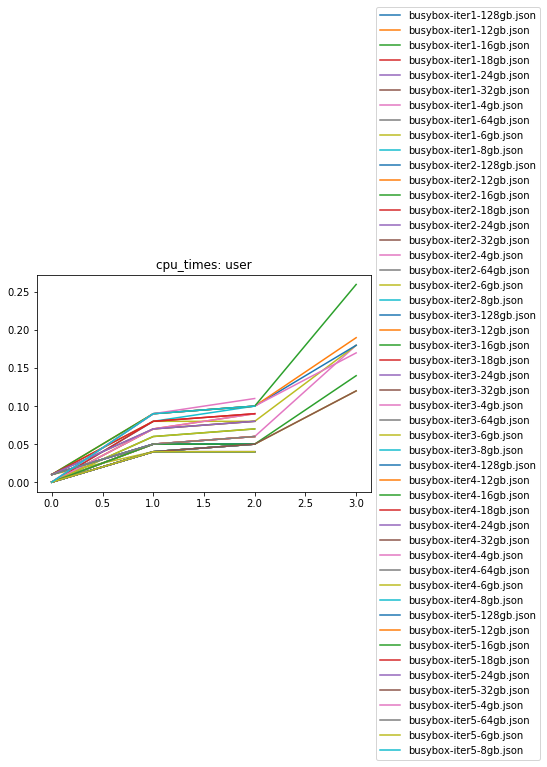

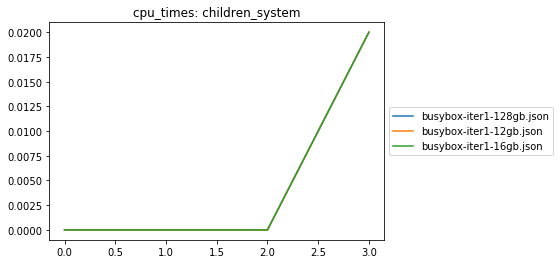

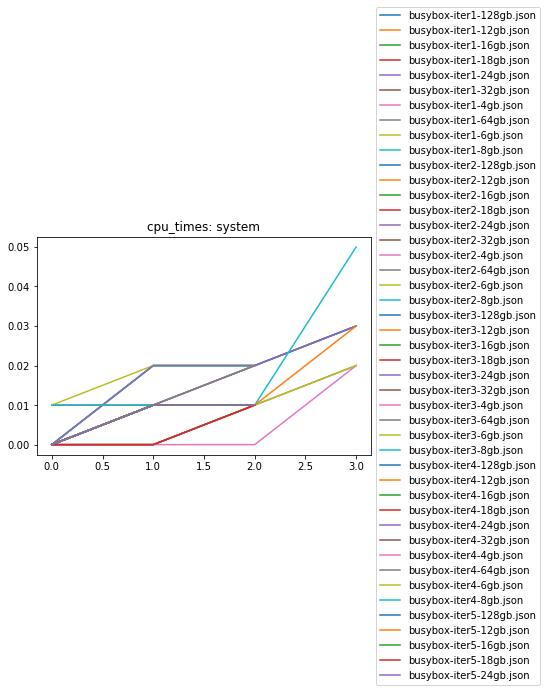

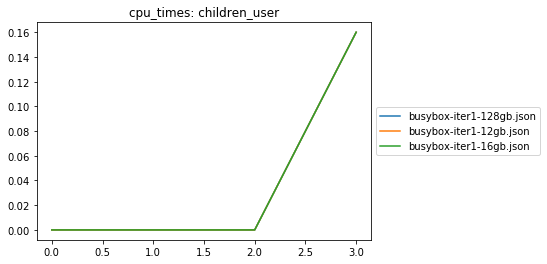

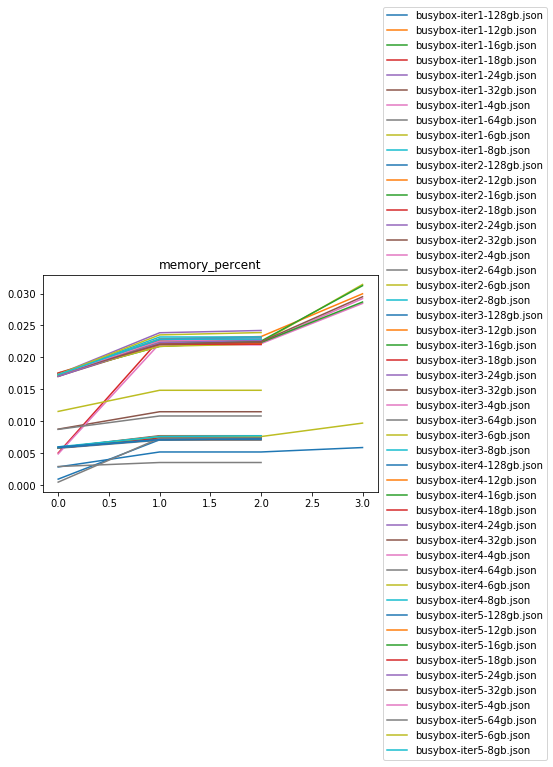

In [21]:
make_plots(busybox, flat_keys)

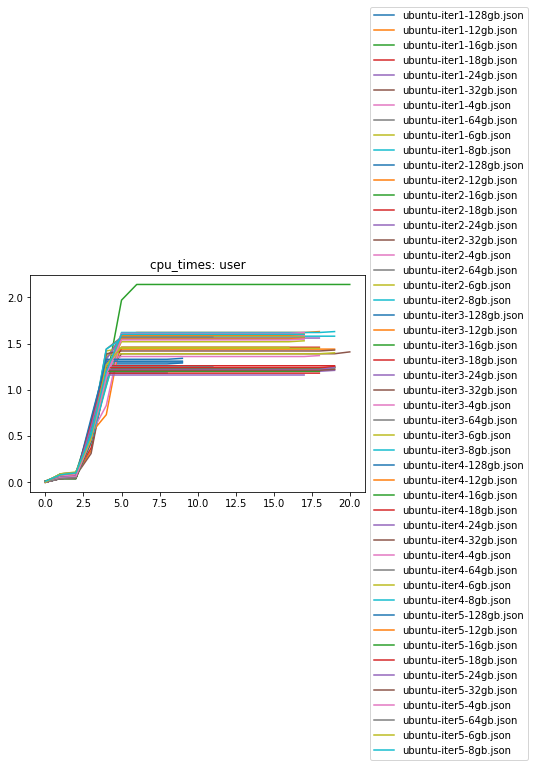

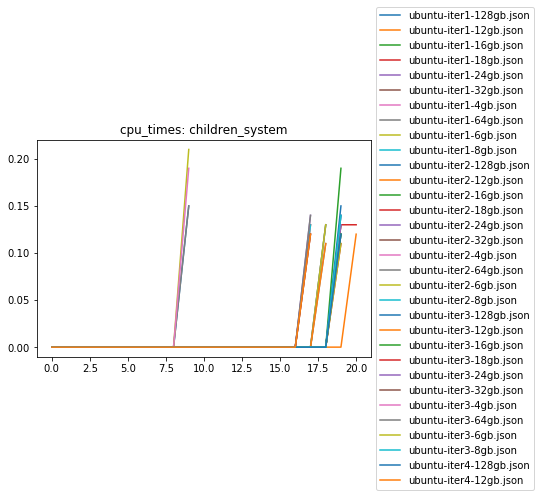

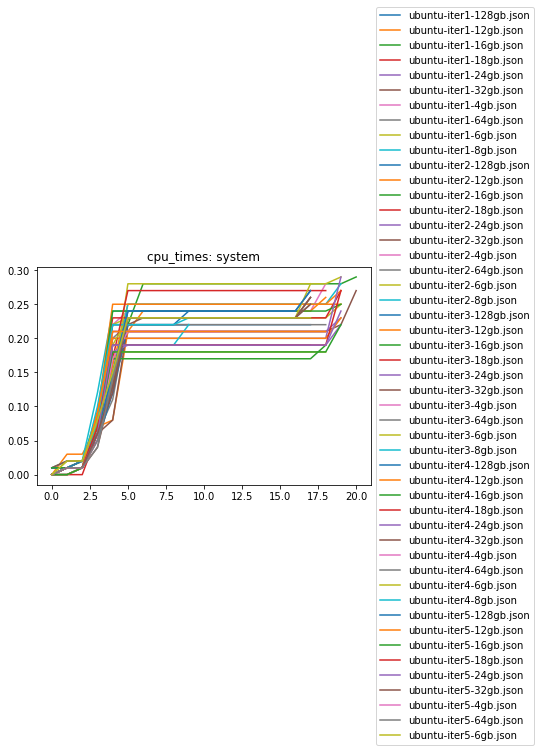

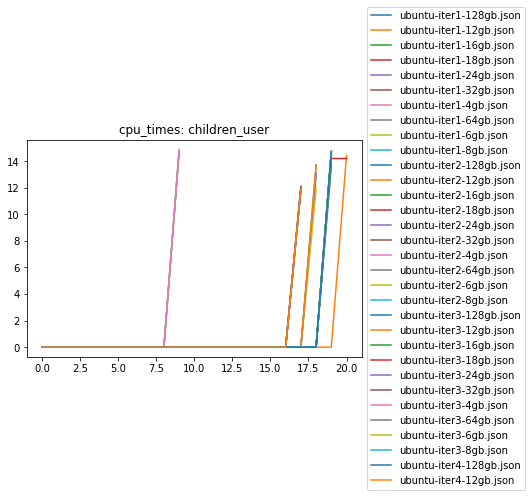

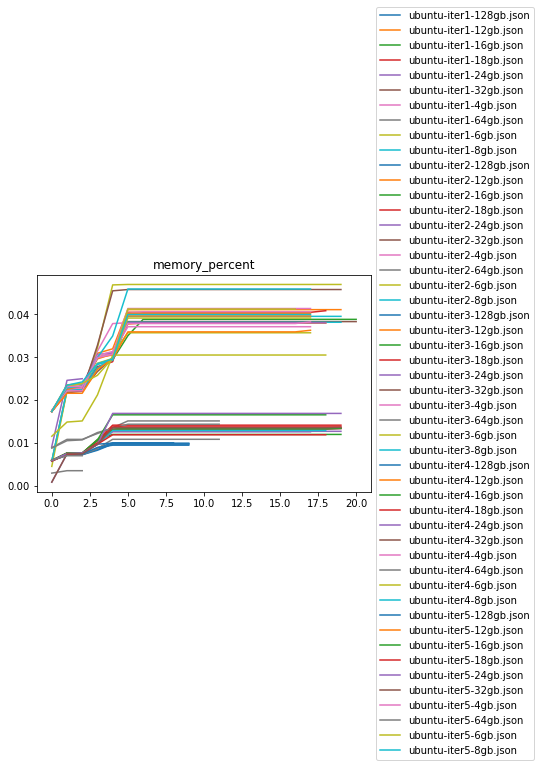

In [22]:
make_plots(ubuntu, flat_keys)

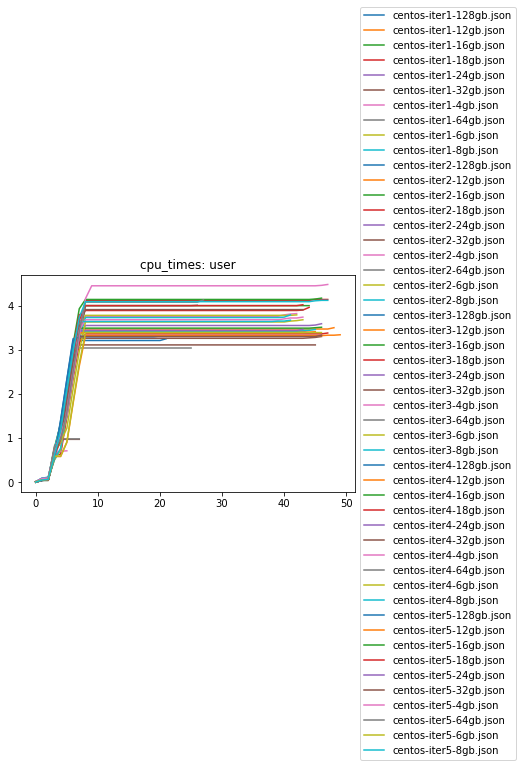

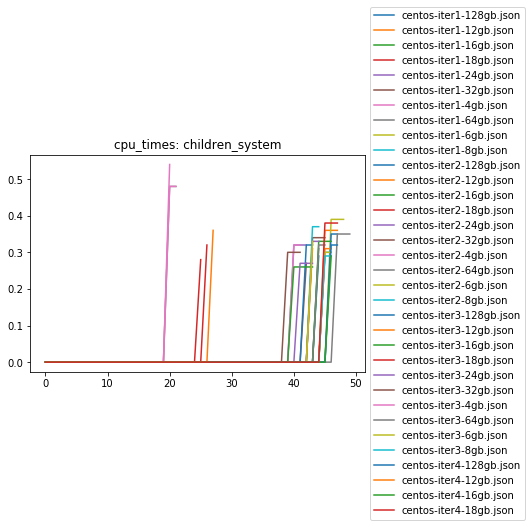

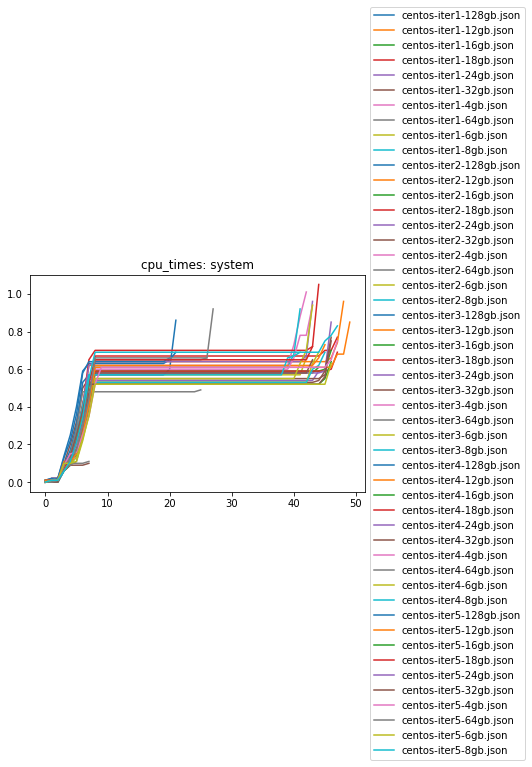

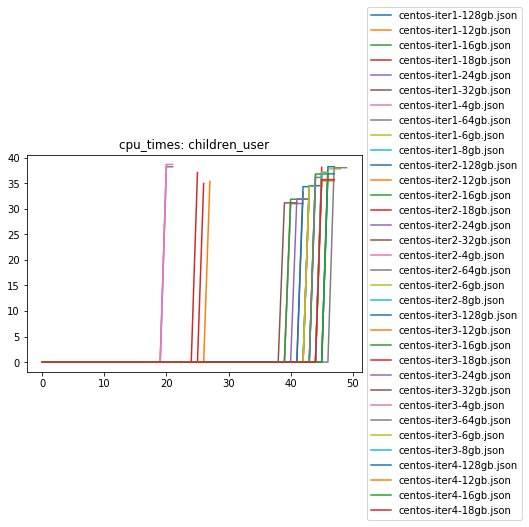

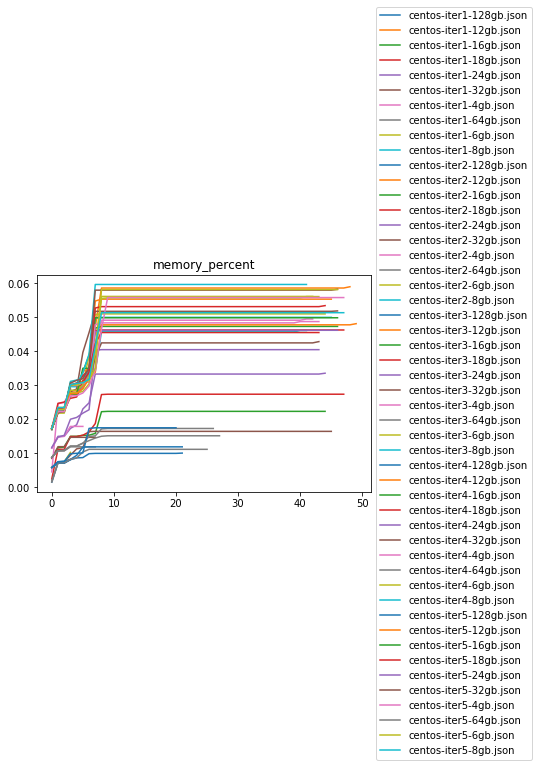

In [23]:
make_plots(centos, flat_keys)

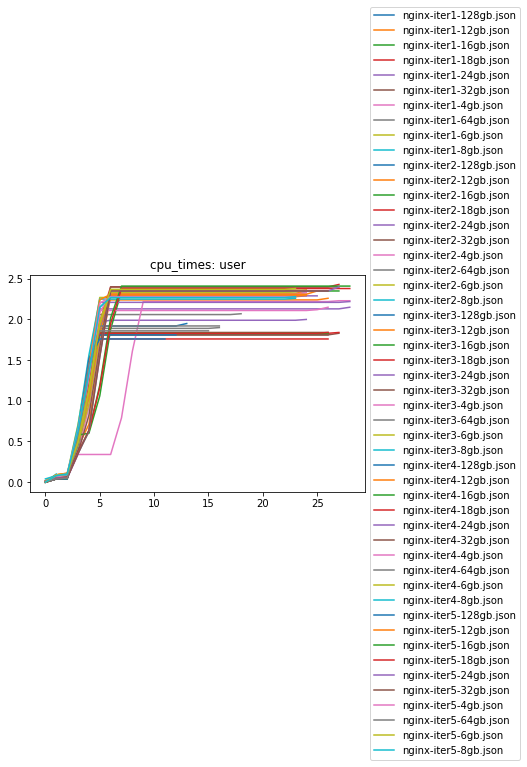

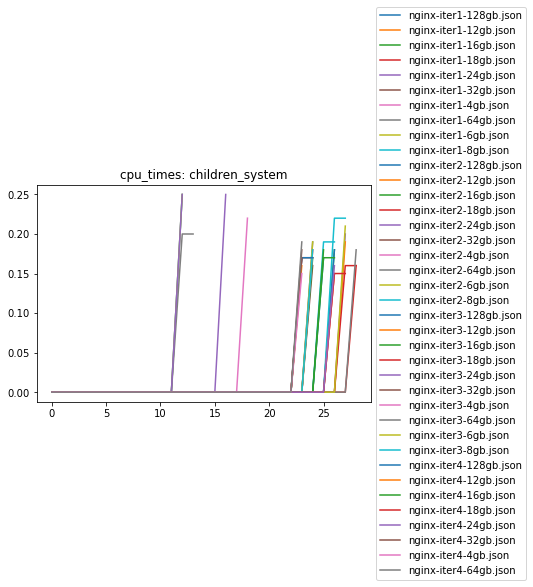

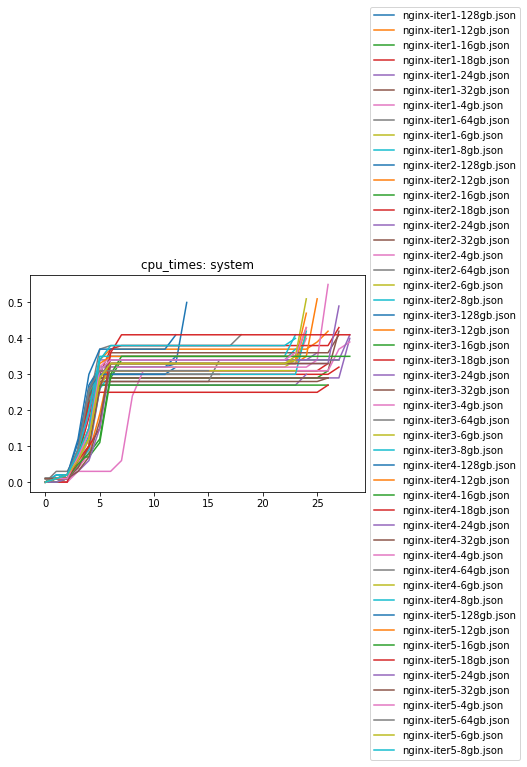

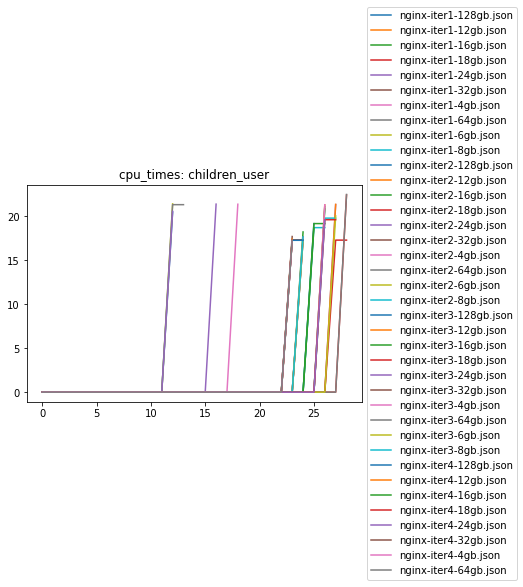

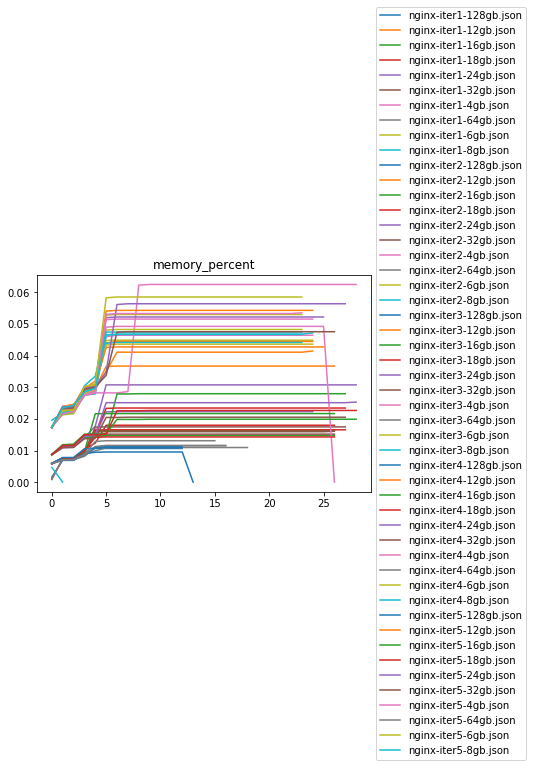

In [24]:
make_plots(nginx, flat_keys)